<a href="https://colab.research.google.com/github/raflysyauqi25/pemrograman_python_1101184105/blob/main/python%2011_image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [344]:
ls

dataset/  nnmodel_scene/  test/  Untitled1.ipynb


In [345]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os


In [346]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [347]:

# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)


In [348]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [349]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [350]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [351]:

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(430, 128, 128, 3)
(144, 128, 128, 3)


In [352]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 12, 12, 64)      

In [353]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 4s 288ms/step - loss: 1.5911 - accuracy: 0.2884 - val_loss: 1.5292 - val_accuracy: 0.3681
Epoch 2/25
14/14 [==============================] - 4s 278ms/step - loss: 1.4243 - accuracy: 0.3395 - val_loss: 1.4351 - val_accuracy: 0.3611
Epoch 3/25
14/14 [==============================] - 4s 278ms/step - loss: 1.3383 - accuracy: 0.4349 - val_loss: 1.4440 - val_accuracy: 0.3611
Epoch 4/25
14/14 [==============================] - 4s 279ms/step - loss: 1.2846 - accuracy: 0.4512 - val_loss: 1.2863 - val_accuracy: 0.4653
Epoch 5/25
14/14 [==============================] - 4s 278ms/step - loss: 1.1884 - accuracy: 0.5070 - val_loss: 1.3020 - val_accuracy: 0.3611
Epoch 6/25
14/14 [==============================] - 4s 278ms/step - loss: 1.1791 - accuracy: 0.5140 - val_loss: 1.1363 - val_accuracy: 0.5764
Epoch 7/25
14/14 [==============================] - 4s 281ms/step - loss: 1.0596 - accuracy: 0.5814 - val_loss: 1.0685 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


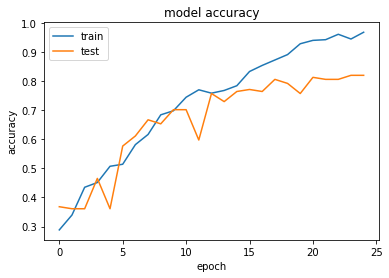

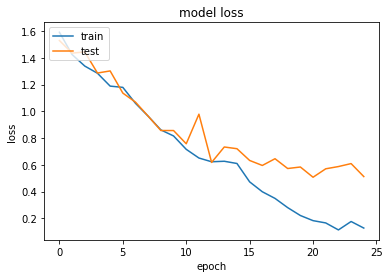

In [354]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [355]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.77      0.89      0.83        19
      GMB_02       0.81      0.76      0.79        29
      GMB_05       0.93      0.82      0.87        33
      GMB_06       1.00      0.74      0.85        35
      GMB_07       0.65      0.93      0.76        28

    accuracy                           0.82       144
   macro avg       0.83      0.83      0.82       144
weighted avg       0.85      0.82      0.82       144



In [356]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [357]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as Plt

ImageFile = 'test/IMG_20200815_201238_HDR.jpg'
print(ImageFile)

test/IMG_20200815_201238_HDR.jpg


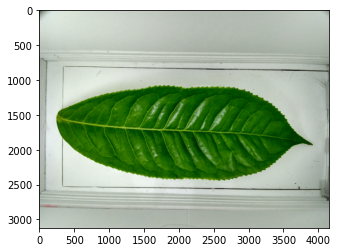

In [358]:
img =Image.open(ImageFile)
Plt.imshow(img)
Plt.show()



In [359]:

np_img= np.array(img)
print(np_img.shape)

(3120, 4160, 3)


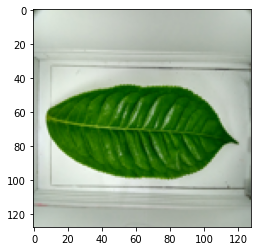

In [360]:
img_rsz = img.resize((128,128))
plt.imshow(img_rsz)
plt.show()

In [361]:
np_img_rsz = np.array(img_rsz)
print(np_img_rsz.shape)

(128, 128, 3)


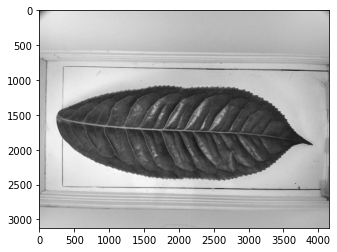

In [362]:
from PIL import ImageOps
gray_img = ImageOps.grayscale(img)
plt.imshow(gray_img, cmap='gray')
plt.show()


In [363]:
image_testing = Image.open('test/IMG_20200815_201238_HDR.jpg')
image_testing = np.array(image_testing.resize((128,128)))/255.0
image_testing.shape


(128, 128, 3)

In [364]:
image_testing =np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [365]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9910480e-01 8.8773906e-04 2.9540235e-09 2.6633923e-06 4.7106787e-06]]
['GMB_01']
